<div style="padding:20px; 
            color:#99eedf;
            margin:10px;
            font-size:220%;
            text-align:center;
            display:fill;
            border-radius:20px;
            border-width: 5px;
            border-style: solid;
            border-color: #99edf;
            background-color:#008970;
            overflow:hidden;
            font-weight:500">NLP with DISASTER TWEETS</div>

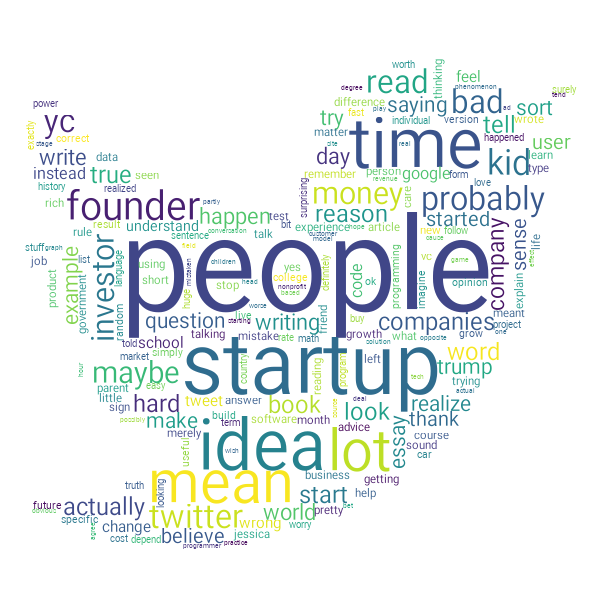

<div style="padding:10px; 
            color:#008970;
            margin:5px;
            font-size:200%;
            text-align:center;
            display:fill;
            border-radius:20px;
            border-width: 5px;
            border-style: solid;
            border-color: #008970;
            background-color:#99edf;
            overflow:hidden;
            font-weight:500">Objectives</div>

Objectives for this notebook are as follows:

* Exploratory Data Analysis
* Cleaning the dataset
* Feature Engineering
* Modelling and evaluation

<div style="padding:10px; 
            color:#008970;
            margin:5px;
            font-size:200%;
            text-align:center;
            display:fill;
            border-radius:20px;
            border-width: 5px;
            border-style: solid;
            border-color: #008970;
            background-color:#99edf;
            overflow:hidden;
            font-weight:500">Table of Contents</div>

1. Importing Essential Libraries
1. Importing Data
1. Data Exploration
1. Text Preprocessing
   * Lowercasing
   * Removing Punctuations
   * Removing StopWords
   * Removing Special Characters
1. Wordcloud
1. TFIDF and Data Splitting
1. Training the Model
1. Testing different Models

<div style="padding:10px; 
            color:#008970;
            margin:5px;
            font-size:200%;
            text-align:center;
            display:fill;
            border-radius:20px;
            border-width: 5px;
            border-style: solid;
            border-color: #008970;
            background-color:#99edf;
            overflow:hidden;
            font-weight:500">Importing Essential Libraries</div>

In [ ]:
#Importing all the neccessary libraries
import pandas as pd
import numpy as np #for linear algebra

#Libraries for visualisation
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

#Libraries for formattting and handling text 
import string
import re

#Library for nltk
import nltk 
import nltk.corpus
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud

from collections import defaultdict
from collections import  Counter
stop=set(stopwords.words('english'))

#Library for NN
from keras.models import Sequential
from keras.layers import Embedding,LSTM,Dense,SpatialDropout1D
from keras.initializers import Constant

#Library for Splitting Dataset
from sklearn.model_selection import train_test_split

#Library for TFIDF
from sklearn.feature_extraction.text import TfidfVectorizer

#Library for evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,classification_report
from scikitplot.metrics import plot_confusion_matrix, plot_roc

import warnings
warnings.filterwarnings("ignore")

In [ ]:
import plotly
plotly.offline.init_notebook_mode (connected = True)

<div style="padding:10px; 
            color:#008970;
            margin:5px;
            font-size:200%;
            text-align:center;
            display:fill;
            border-radius:20px;
            border-width: 5px;
            border-style: solid;
            border-color: #008970;
            background-color:#99edf;
            overflow:hidden;
            font-weight:500">Importing Data</div>

In [ ]:
#Loading the required data
df_train=pd.read_csv('/kaggle/input/nlp-getting-started/train.csv')
df_test=pd.read_csv('/kaggle/input/nlp-getting-started/test.csv')


In [ ]:
df_train.head()

In [ ]:
print('For train dataset:')
print('There are {} rows and {} columns in train dataset.'.format(df_train.shape[0],df_train.shape[1]))
print('For test dataset:')
print('There are {} rows and {} columns in test dataset.'.format(df_test.shape[0],df_test.shape[1]))

In [ ]:
df_train.info()

In [ ]:
print('Sample text from the train dataset:')
df_train['text'][56]

<div style="padding:10px; 
            color:#008970;
            margin:5px;
            font-size:200%;
            text-align:center;
            display:fill;
            border-radius:20px;
            border-width: 5px;
            border-style: solid;
            border-color: #008970;
            background-color:#99edf;
            overflow:hidden;
            font-weight:500">Data Exploration</div>

In [ ]:
fig=px.bar(data_frame=df_train,x=df_train.target.value_counts().index,y=df_train.target.value_counts())
fig.update_layout(xaxis_title='Target',yaxis_title='No. of data points',title={
        'text': "Distribution of the Target column",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.show()

It can be seen that there are more tweets for class 0 than class 1.

<font color="green" size=+2.5><b> Keywords Analysis </b></font>

We have seen above that some of the data entries for keywords are missing thus we would like to find the percentage of those missing data points to make a decision on including/excluding this column for our analysis

In [ ]:
perc=100*(df_train['keyword'].isnull().sum()/len(df_train))
perc0=100*(df_train[df_train['target']==0]['keyword'].isnull().sum()/len(df_train[df_train['target']==0]))
perc1=100*(df_train[df_train['target']==1]['keyword'].isnull().sum()/len(df_train[df_train['target']==1]))
print(f'Percentage of missing keyword values in the whole training set is {np.round(perc,2)} %')
print(f'Percentage of missing keyword values in the training set(target=0) is {np.round(perc0,2)} %')
print(f'Percentage of missing keyword values in the training set(target=1) is {np.round(perc1,2)} %')

In [ ]:
fig=make_subplots(rows=2,cols=1,subplot_titles=("Keyword Distribution in Non-Disaster Tweets", "Keyword Distribution in Disaster Tweets"))

fig.add_trace(go.Bar(x=df_train[df_train['target']==0]['keyword'].value_counts()[:30].index,y=df_train[df_train['target']==0]['keyword'].value_counts()[:30]),row=1,col=1)

fig.add_trace(go.Bar(x=df_train[df_train['target']==1]['keyword'].value_counts()[:30].index,y=df_train[df_train['target']==1]['keyword'].value_counts()[:30]),row=2,col=1)

fig.update_layout(height=1000, width=1000,
                  title={
        'text': "Keyword Analysis for Tweets",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},showlegend=False)

fig.show()

<font color="green" size=+2.5><b> Location Analysis of tweets </b></font>

We have seen above that some of the data entries for locations are missing thus we would like to find the percentage of those missing data points to make a decision on including/excluding this column for our analysis

In [ ]:
loc=100*(df_train['location'].isnull().sum()/len(df_train))
loc0=100*(df_train[df_train['target']==0]['location'].isnull().sum()/len(df_train[df_train['target']==0]))
loc1=100*(df_train[df_train['target']==1]['location'].isnull().sum()/len(df_train[df_train['target']==1]))
print(f'Percentage of missing location values in the whole training set is {np.round(loc,2)} %')
print(f'Percentage of missing location values in the training set(target=0) is {np.round(loc0,2)} %')
print(f'Percentage of missing location values in the training set(target=1) is {np.round(loc1,2)} %')

In [ ]:
fig=make_subplots(rows=2,cols=1,subplot_titles=("Location Distribution in Non-Disaster Tweets", "Location Distribution in Disaster Tweets"))

fig.add_trace(go.Bar(x=df_train[df_train['target']==0]['location'].value_counts()[:30].index,y=df_train[df_train['target']==0]['location'].value_counts()[:30]),row=1,col=1)

fig.add_trace(go.Bar(x=df_train[df_train['target']==1]['location'].value_counts()[:30].index,y=df_train[df_train['target']==1]['location'].value_counts()[:30]),row=2,col=1)

fig.update_layout(height=1000, width=1000,
                  title={
        'text': "Location Analysis for Tweets",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},showlegend=False)

fig.show()

In [ ]:
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter
import folium 
from folium import plugins 

new_df = pd.DataFrame()
new_df['location'] = ((df_train['location'].value_counts())[:10]).index
new_df['count'] = ((df_train['location'].value_counts())[:10]).values
geolocator = Nominatim(user_agent = 'Rahil')
geocode = RateLimiter(geolocator.geocode, min_delay_seconds = 0.5)
lat = {}
long = {}
for i in new_df['location']:
    location = geocode(i)
    lat[i] = location.latitude
    long[i] = location.longitude
new_df['latitude'] = new_df['location'].map(lat)
new_df['longitude'] = new_df['location'].map(long)
map = folium.Map(location = [10.0, 10.0], tiles = 'CartoDB dark_matter', zoom_start = 1.5)
markers = []
title = '''<h1 align = "center" style = "font-size: 15px"><b>Top 10 Tweet Locations</b></h1>'''
for i, r in new_df.iterrows():
    loss = r['count']
    if r['count'] > 0:
        counts = r['count'] * 0.4
        folium.CircleMarker([float(r['latitude']), float(r['longitude'])], radius = float(counts), color = 'lightcoral', fill = True).add_to(map)
map.get_root().html.add_child(folium.Element(title))
map

<font color="green" size=+2.5><b> Further EDA of tweets </b></font>

For further data exploration,my natural thought process for such NLP problems is to now find relation between the length of the text available and the target label in the data. Thus we will perform character level,word level and sentence level analysis on the tweets

* text_len: Number of words in the tweet
* text_char_len: Number of characters in the tweet

In [ ]:
#Generating the column text_len
df_train['text_len']=df_train['text'].apply(lambda x:len(x.split()))

#The below function comes in handy to count the number of characters in a text
def char_count(text):
    charc=0
    for char in text.split():
        charc +=len(char)
    return charc

#Generating the column text_char_len
df_train['text_char_len']=df_train['text'].apply(char_count)

In [ ]:
df_train.head()

In [ ]:
fig = make_subplots(rows=2, cols=2,subplot_titles=("Words Distribution in Non-Disaster Tweets", "Words Distribution in Disaster Tweets",
                                                   "Character Distribution in Non-Disaster Tweets", "Character Distribution in Disaster Tweets"))

fig.add_trace(go.Histogram(x=df_train[df_train['target']==0]['text_len']),row=1, col=1)

fig.add_trace(go.Histogram(x=df_train[df_train['target']==1]['text_len']),row=1, col=2)

fig.add_trace(go.Histogram(x=df_train[df_train['target']==0]['text_char_len']),row=2, col=1)

fig.add_trace(go.Histogram(x=df_train[df_train['target']==1]['text_char_len']),row=2, col=2)

fig.update_layout(height=1000, width=1000,
                  title={
        'text': "Text Level Analysis for Tweets",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},showlegend=False)

fig.show()

<font color="green" size=+2.5><b> Top 100 most used words in tweets for each target </b></font>

In [ ]:
#Analysis for Non-Disaster Tweets
freqw=df_train[df_train['target']==0]['text'].str.split(expand=True).stack().value_counts()
freq100=freqw[:100]

fig=px.treemap(freq100,path=[freq100.index],values=0)
fig.update_traces(textinfo="label+value")
fig.update_layout(title={
        'text': "Non-Disaster Tweets",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.show()

In [ ]:
#Analysis for Disaster Tweets
freqw=df_train[df_train['target']==1]['text'].str.split(expand=True).stack().value_counts()
freq100=freqw[:100]

fig=px.treemap(freq100,path=[freq100.index],values=0)
fig.update_traces(textinfo="label+value")
fig.update_layout(title={
        'text': "Disaster Tweets",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.show()

<font color="green" size=+2.5><b> Analysing the corpus for most common words </b></font>

In [ ]:
corpus=[]
    
for x in df_train['text'].str.split():
    for i in x:
        corpus.append(i)

In [ ]:
dic=defaultdict(int)
for word in corpus:
    if word not in stop:
        dic[word]+=1

top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:30] 
x,y=zip(*top)
fig=px.bar(x=x,y=y)
fig.update_layout(title={
        'text': "Most Common Non-StopWords",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},xaxis_title='Words',yaxis_title='Frequency')

From the above it is evident that many of the common words in the corpus are special characters and thus need to be removed while text cleaning

In [ ]:
dic=defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word]+=1

top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:30] 
x,y=zip(*top)
fig=px.bar(x=x,y=y)
fig.update_layout(title={
        'text': "Most Common StopWords",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},xaxis_title='Words',yaxis_title='Frequency')

In [ ]:
dic=defaultdict(int)
punc=string.punctuation
for word in corpus:
    if word in punc:
        dic[word]+=1

top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:30] 
x,y=zip(*top)
fig=px.bar(x=x,y=y)
fig.update_layout(title={
        'text': "Most Common Punctuations",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},xaxis_title='Words',yaxis_title='Frequency')

<div style="padding:10px; 
            color:#008970;
            margin:5px;
            font-size:200%;
            text-align:center;
            display:fill;
            border-radius:20px;
            border-width: 5px;
            border-style: solid;
            border-color: #008970;
            background-color:#99edf;
            overflow:hidden;
            font-weight:500">Cleaning Text</div>

As we know it is difficult for computers to understand the semantics of the texts in their pure form so it becomes necessary to preprocess the data to convert it into a form that can be fed to the computer for analysis.

Here, we transform the text data as follows:

*  Convert to Lowercase
* Clean special characters
*  Remove punctuations
*  Remove stopwords
* Stemming/Lemmatization

<font color="green" size=+2.5><b> Lowercase and special characters </b></font>

In [ ]:
def clean_text(text):
    text=str(text).lower() #Converts text to lowercase
    text=re.sub('\d+', '', text) #removes numbers
    text=re.sub('\[.*?\]', '', text) #removes HTML tags
    text=re.sub('https?://\S+|www\.\S+', '', text) #removes url
    text=re.sub(r"["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", "", text) #removes emojis
    text=re.sub('[%s]' % re.escape(string.punctuation),'',text) #removes punctuations
    #text = re.sub('\n', '', text)
    #text = re.sub('\w*\d\w*', '', text)
    return text

In [ ]:
df_train['clean_text']=df_train['text'].apply(clean_text)
df_train.head()

<font color="green" size=+2.5><b> Stopwords </b></font>

Stop words are the most commonly occurring words that don’t give any additional value to the document vector. in-fact removing these will increase computation and space efficiency. nltk library has a method to download the stopwords, so instead of explicitly mentioning all the stopwords ourselves we can just use the nltk library and iterate over all the words and remove the stop words. There are many efficient ways to do this, but we will perform a simple method.

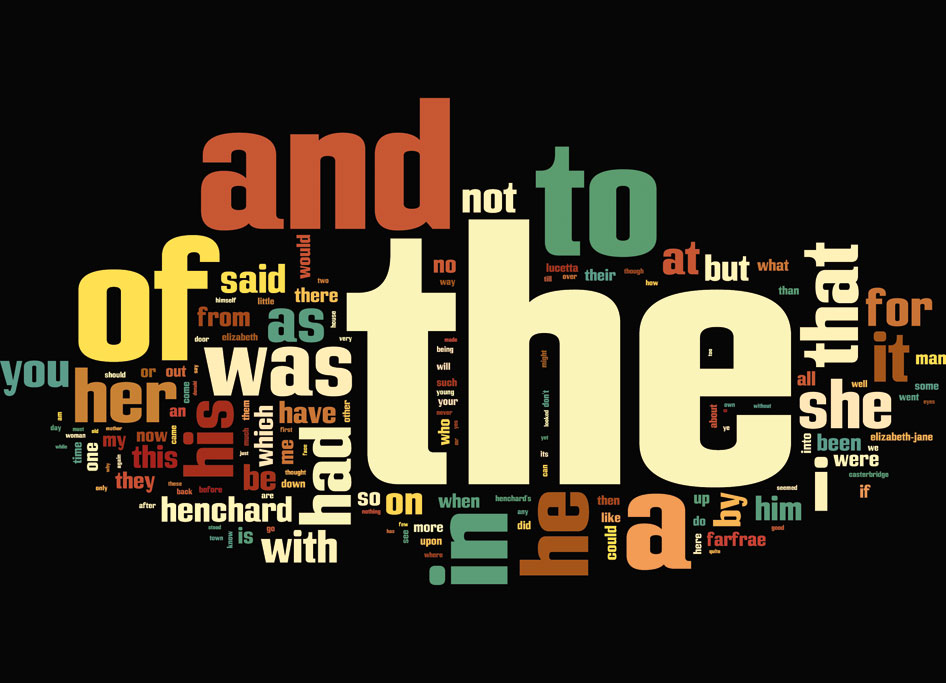

In [ ]:
df_train['clean_text'] = df_train['clean_text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
df_train.head()

[<font color="green" size=+2.5><b> Lemmatize </b></font>](http://)

Lemmatisation is a way to reduce the word to the root synonym of a word. Unlike Stemming, Lemmatisation makes sure that the reduced word is again a dictionary word (word present in the same language). WordNetLemmatizer can be used to lemmatize any word.

In [ ]:
lemma=WordNetLemmatizer()

def preprocessdata(text):
    text= ' '.join(lemma.lemmatize(word) for word in text.split(' '))
    return text

df_train['final_text']=df_train['clean_text'].apply(preprocessdata)
df_train.head()

<font color="green" size=+2.5><b> Top 100 most used words in tweets for each target for cleaned data </b></font>

In [ ]:
#Analysis for Non-Disaster Tweets
freqw=df_train[df_train['target']==0]['final_text'].str.split(expand=True).stack().value_counts()
freq100=freqw[:100]

fig=px.treemap(freq100,path=[freq100.index],values=0)
fig.update_traces(textinfo="label+value")
fig.update_layout(title={
        'text': "Non-Disaster Tweets",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.show()

In [ ]:
#Analysis for Disaster Tweets
freqw=df_train[df_train['target']==1]['final_text'].str.split(expand=True).stack().value_counts()
freq100=freqw[:100]

fig=px.treemap(freq100,path=[freq100.index],values=0)
fig.update_traces(textinfo="label+value")
fig.update_layout(title={
        'text': "Disaster Tweets",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.show()

<font color="green" size=+2.5><b> Wordcloud </b></font>

In [ ]:
#For Non-Disaster Tweets
plt.figure(figsize=(15,10))
wc=WordCloud(max_words=500,background_color='white')
wc.generate(' '.join(word for word in df_train.loc[df_train['target']==0,'final_text']))
plt.imshow(wc)
plt.axis('off')
plt.title('Non-Disaster Tweets')
plt.show()

In [ ]:
#For Disaster Tweets
plt.figure(figsize=(15,10))
wc=WordCloud(max_words=500,background_color='white')
wc.generate(' '.join(word for word in df_train.loc[df_train['target']==1,'final_text']))
plt.imshow(wc)
plt.axis('off')
plt.title('Disaster Tweets')
plt.show()

<div style="padding:10px; 
            color:#008970;
            margin:5px;
            font-size:200%;
            text-align:center;
            display:fill;
            border-radius:20px;
            border-width: 5px;
            border-style: solid;
            border-color: #008970;
            background-color:#99edf;
            overflow:hidden;
            font-weight:500">TFIDF and Splitting Data</div>

In [ ]:
# Splitting data into features(X) and targets(y)
X=df_train['final_text']
y=df_train['target'].values

In [ ]:
from sklearn.model_selection import train_test_split

# Splitting the data into train and test sets to use in models
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size= 0.2, random_state= 42,stratify=y)

TF-IDF stands for Term Frequency Inverse Document Frequency of records. It can be defined as the calculation of how relevant a word in a series or corpus is to a text. The meaning increases proportionally to the number of times in the text a word appears but is compensated by the word frequency in the corpus (data-set).

In [ ]:
tfidf=TfidfVectorizer()
X_train=tfidf.fit_transform(X_train).toarray()
X_test=tfidf.transform(X_test).toarray()

<div style="padding:10px; 
            color:#008970;
            margin:5px;
            font-size:200%;
            text-align:center;
            display:fill;
            border-radius:20px;
            border-width: 5px;
            border-style: solid;
            border-color: #008970;
            background-color:#99edf;
            overflow:hidden;
            font-weight:500">Defining a Training Function</div>

Now we will try different models and evaluate each of them.

We will be using confusion matrix and ROC curve to evaluate them. Confusion matrix is formed from the four outcomes produced as a result of binary classification.

It's a binary classifier predicts all data instances of a test dataset as either positive or negative. This classification (or prediction) produces four outcomes – true positive, true negative, false positive and false negative.

* **True positive (TP)**: correct positive prediction
* **False positive (FP)**: incorrect positive prediction
* **True negative (TN)**: correct negative prediction
* **False negative (FN)**: incorrect negative prediction

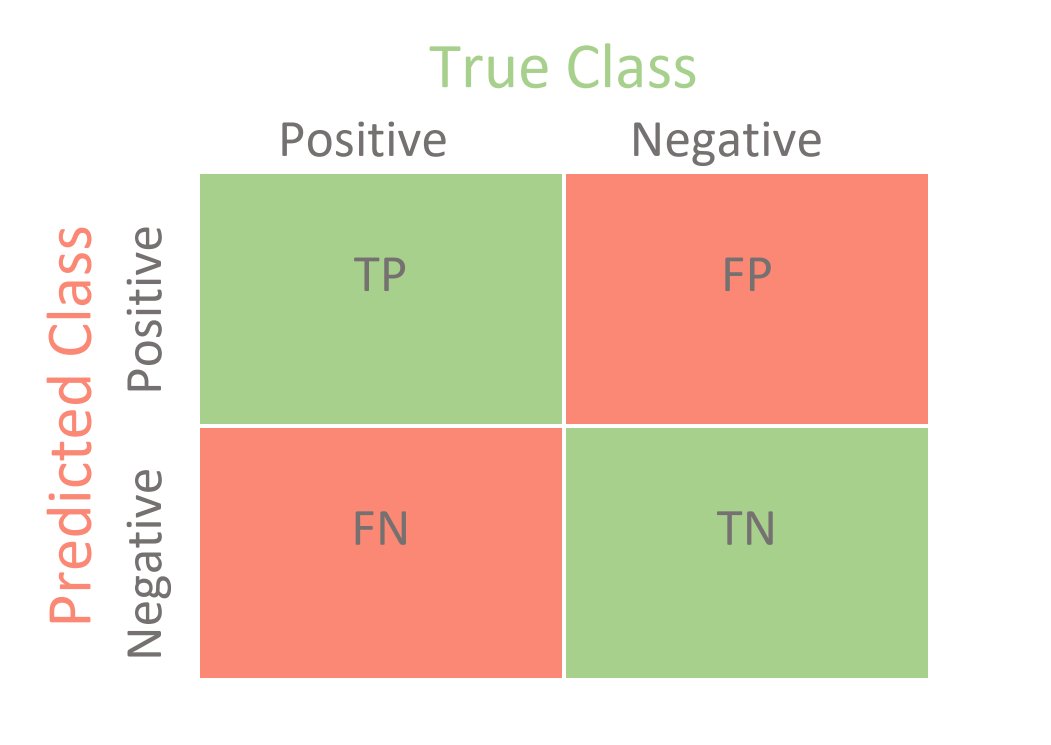

In [ ]:
def train_model(model):
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    y_prob=model.predict_proba(X_test)
    accuracy=round(accuracy_score(y_test,y_pred),3)
    precision=round(precision_score(y_test,y_pred,average='weighted'),3)
    recall=round(recall_score(y_test,y_pred,average='weighted'),3)
    
    print(f'Accuracy of the model: {np.round(accuracy*100,2)}%')
    print(f'Precision Score of the model: {np.round(precision*100,2)}%')
    print(f'Recall Score of the model: {np.round(recall*100,2)}%')
    print('-'*50)
    print(classification_report(y_test,y_pred))
    
    fig, ax = plt.subplots(1, 2, figsize = (25,  8))
    ax1 = plot_confusion_matrix(y_test, y_pred, ax= ax[0], cmap= 'YlGnBu')
    ax2 = plot_roc(y_test, y_prob, ax= ax[1], plot_macro= False, plot_micro= False, cmap= 'summer')

<div style="padding:10px; 
            color:#008970;
            margin:5px;
            font-size:200%;
            text-align:center;
            display:fill;
            border-radius:20px;
            border-width: 5px;
            border-style: solid;
            border-color: #008970;
            background-color:#99edf;
            overflow:hidden;
            font-weight:500">Testing Models</div>

<font color="green" size=+2.5><b> BERNOULLI NAIVE BAYES </b></font>

In [ ]:
from sklearn.naive_bayes import BernoulliNB

bnb=BernoulliNB()
train_model(bnb);

<font color="green" size=+2.5><b> MULTINOMIAL NAIVE BAYES </b></font>

In [ ]:
from sklearn.naive_bayes import MultinomialNB

mnb=MultinomialNB()
train_model(mnb);

<font color="green" size=+2.5><b> LOGISTIC REGRESSION </b></font>

In [ ]:
from sklearn.linear_model import LogisticRegression

logreg=LogisticRegression()
train_model(logreg)

<font color="green" size=+2.5><b> K-Nearest Neighbors </b></font>

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 7,weights = 'distance',algorithm = 'brute')
train_model(knn)

<font color="green" size=+2.5><b> Decision Tree </b></font>

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(criterion= 'entropy',
                                           max_depth = None, 
                                           splitter='best', 
                                           random_state=42)
train_model(dt)

<font color="green" size=+2.5><b> Random Forest </b></font>

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
train_model(rf)

<font color="green" size=+2.5><b> Final Model Selection </b></font>

Our evaluation metrics have found that Logistic Regression,Bernoulli Naive Bayes and Multinomial Naive Bayes perform the best with the chosen hyperparameter settings. Let's test these models one final time to select the best model depending on performance and processing time.

In [ ]:
# create a dictionary of the final models
final_models = {'lr': LogisticRegression(),
                'mnb': MultinomialNB(),
                'bnb': BernoulliNB()} 

In [ ]:
import time

def classify(clf, X_train, X_test, y_train, y_test):
    y_pred = clf.fit(X_train, y_train).predict(X_test)
    precision = precision_score(y_test, y_pred)
    fscore = f1_score(y_test, y_pred)
    train_accuracy = clf.score(X_train, y_train)
    test_accuracy = accuracy_score(y_test, y_pred)
    return precision, fscore, train_accuracy, test_accuracy

for name, clf in final_models.items():
    i_precision, i_fscore, i_train_accuracy, i_test_accuracy = classify(clf, X_train, X_test, y_train, y_test)
    
    # check the time
    start = time.time()
    
    # fit and predict
    y_pred = clf.fit(X_train, y_train).predict(X_test)
    
    # check the time
    end = time.time()
    
    # print out the scores and classification reports
    print('[{}]\nProcessing Time: {} secs | Test Accuracy: {} | Precision: {} | F1-score: {}\n'.format(name, 
                                                                                                  round(end-start, 2),
                                                                                                  round(i_test_accuracy, 2),
                                                                                                  round(i_precision, 2), 
                                                                                                  round(i_fscore, 2)))

From our top three models:

* The Logistic Regression model and Multinomial Naive Bayes model are closest in terms of accuracy, but mnb is faster and has slightly higher precision.
* In terms of F-1 score, the Logistic Regression model is the highest.
* The Bernoulli Naive Bayes model does not perform as well as the other two.

Thus taking both performance and processing time in consideration,we will be selecting the ***Multinomial Naive Bayes*** model for evaluation on the testing/submission dataset.

<div style="padding:10px; 
            color:#008970;
            margin:5px;
            font-size:200%;
            text-align:center;
            display:fill;
            border-radius:20px;
            border-width: 5px;
            border-style: solid;
            border-color: #008970;
            background-color:#99edf;
            overflow:hidden;
            font-weight:500">Submission</div>

In [ ]:
df_test=pd.read_csv('/kaggle/input/nlp-getting-started/test.csv')
df_test.head()

In [ ]:
#Preprocessing the text column
df_test['clean_text']=df_test['text'].apply(clean_text)
df_test['clean_text'] = df_test['clean_text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
df_test['final_text']=df_test['clean_text'].apply(preprocessdata)

In [ ]:
#Performing TFIDF for the test dataset
eval=tfidf.transform(df_test['final_text']).toarray()

In [ ]:
#Making predictions and checking the processing time
start = time.time()
final_pred = mnb.predict(eval)
end = time.time()
pred_time = end - start

print('Prediction time: {} secs'.format(round(pred_time, 2)))

In [ ]:
submission = df_test[['id']].reset_index(drop=True)
submission['target'] = final_pred.astype('int64')

In [ ]:
submission

In [ ]:
submission.to_csv('submission.csv', index=False)